In [ ]:
import pandas as pd
import pytz
import numpy as np
import sqlite3
import datetime as dt
import matplotlib.pyplot as plt
from datetime import time
import seaborn as sns


# Names John s, John M, Abigail C

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path1 = '/content/drive/MyDrive/Colab Notebooks/Fin 497/Fin497_Docs_notebooks/return_train_2017_2021.csv'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/Fin 497/Fin497_Docs_notebooks/sentiment_train_2017_2021.csv'
#file_path3 = '/content/drive/MyDrive/Colab Notebooks/Fin 497/Fin497_Docs_notebooks/merged2_stock_data.csv'

Mounted at /content/drive


In [ ]:
returns_data = pd.read_csv(file_path1)
returns_data['Return'] = returns_data['Return'].str.replace('%', '').astype(float)
returns_data['Return']=returns_data['Return']/100
returns_data['Date']=pd.to_datetime(returns_data['Date'])
returns_data.info()

returns_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459589 entries, 0 to 2459588
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Ticker  object        
 2   D0      float64       
 3   D1      float64       
 4   Return  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.8+ MB


,Date,Ticker,D0,D1,Return
0,2017-01-03,A,46.49,47.10,0.0131
1,2017-01-03,AA,28.63,30.05,0.0496
2,2017-01-03,AAIC,9.16,9.26,0.0109
3,2017-01-03,AAL,46.30,46.70,0.0086
4,2017-01-03,AAN,31.90,32.57,0.0210
...,...,...,...,...,...
2459584,2021-12-31,ZUMZ,47.99,48.01,0.0004
2459585,2021-12-31,ZUO,18.68,18.35,-0.0177
2459586,2021-12-31,ZY,6.69,7.02,0.0493
2459587,2021-12-31,ZYNE,2.88,3.02,0.0486


In [ ]:
reddit_data = pd.read_csv(file_path2)
reddit_data

,StoryID,Post_Time,Received_Time,Ticker,Country,ISIN,Relevance,Sentiment,Confidence,Prob_POS,...,Prob_NEG,Reddit_Topic,TopicWeight,Alex_Topic,Source,SourceWeight,LinkID,Author,Novelty,Comment_Count
0,RR20170101VFVFDB4TGnM=,2017-01-01 00:03:09.000,2017-01-01 00:05:09,HOOD,USA,US7707001027,1.000000,0,0.874448,0.041390,...,0.042320,NaN,-0.017089,AA@ALEX,investing_RSRR,0.039016,5l882m,e9450a943f651434728bf39a643d9036,1,1
1,RR20170101VFVFDBsVG3M=,2017-01-01 00:06:59.000,2017-01-01 00:08:59,PRI,USA,US74164M1080,1.000000,-1,0.709253,0.059022,...,0.806161,NaN,-0.017089,AA@ALEX,wsb_RSRR,-0.000515,5l6kro,d0226c99ff38dd5e6cb87d7766dc798f,1,1
2,RR20170101VFVFD1RXCXM=,2017-01-01 00:15:36.000,2017-01-01 00:17:36,BHE,USA,US08160H1014,1.000000,0,0.461974,0.021243,...,0.337447,Help,-0.029671,"AA@ALEX,AA@ERN",investing_RSRR,0.039016,5lbz7h,f33c6e9d637b862f4289aaaf6555b498,1,2
3,RR20170101VFVFD1QMCnM=,2017-01-01 00:15:56.000,2017-01-01 00:17:56,LOGM,USA,US54142L1098,0.703235,-1,0.531746,0.068879,...,0.687824,NaN,-0.017089,AA@ALEX,wsb_RSR,0.007037,5lcb5w,6de93d1b8410255dcdc19d5067db1eac,1,1
4,RR20170101VFVFDg9QCHM=,2017-01-01 00:45:04.000,2017-01-01 00:47:04,SUN,USA,US86765K1097,0.254271,1,0.212626,0.475079,...,0.326759,NaN,-0.017089,"AA@OPS,AA@ALEX",wsb_RSRR,-0.000515,5lc6t6,6de93d1b8410255dcdc19d5067db1eac,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929994,RR20211231WEZBFAdUEnM=,2021-12-31 23:56:12.000,2021-12-31 23:58:12,KWEB,USA,US5007673065,0.407332,0,0.328565,0.024522,...,0.423107,NaN,-0.009957,AA@ALEX,wsb_RSR,-0.007709,rt6lv6,011e906ea27e8f712e0eed5ae25940b6,2,1
11929995,RR20211231WEZBFABdQXM=,2021-12-31 23:56:26.000,2021-12-31 23:58:26,DKNG,USA,US26142R1041,0.670034,1,0.766145,0.844088,...,0.074172,Meme,0.002040,AA@ALEX,wsb_RSR,-0.007709,rt582o,367875d35546f270f24477176f80637b,1,6
11929996,RR20211231WEZBFABdQXM=,2021-12-31 23:56:26.000,2021-12-31 23:58:26,FB,USA,US30303M1027,0.670034,1,0.766145,0.844088,...,0.074172,Meme,0.002040,AA@ALEX,wsb_RSR,-0.007709,rt582o,367875d35546f270f24477176f80637b,1,6
11929997,RR20211231WEZBFB9QTHM=,2021-12-31 23:57:55.000,2021-12-31 23:59:55,GME,USA,US36467W1099,1.000000,1,0.353294,0.568857,...,0.018079,YOLO,0.049235,AA@ALEX,wsb_RSRR,-0.004588,rsx5an,5eae7befbcd89fa2b184ba2924fe8408,1,18


# FIXING DATES

In [ ]:
#Cleaning the Sentiment Data from Reddit

def preprocess_sentiment_data(reddit_data):
    reddit_data = reddit_data.copy()

    # Convert Received_Time to datetime with timezone if needed
    if 'Received_Time' in reddit_data.columns:
        reddit_data['Received_Time'] = pd.to_datetime(reddit_data['Received_Time'])
        # Add UTC timezone if not present
        if reddit_data['Received_Time'].dt.tz is None:
            reddit_data['Received_Time'] = reddit_data['Received_Time'].dt.tz_localize('UTC')

    # Create Received_Time_EST if needed
    if 'Received_Time' in reddit_data.columns and 'Received_Time_EST' not in reddit_data.columns:
        reddit_data['Received_Time_EST'] = reddit_data['Received_Time'].dt.tz_convert('America/New_York')

    # Create Date column if not present, handling the 4PM cutoff
    if 'Date' not in reddit_data.columns and 'Received_Time_EST' in reddit_data.columns:
        cutoff = time(16, 0)  # 4:00 PM
        reddit_data['local_date'] = reddit_data['Received_Time_EST'].dt.date

        # Shift day by +1 if it's after 4pm
        reddit_data['Date'] = np.where(
            reddit_data['Received_Time_EST'].dt.time > cutoff,
            pd.to_datetime(reddit_data['local_date']) + pd.Timedelta(days=1),
            pd.to_datetime(reddit_data['local_date'])
        )

    # Handle Weekends: if the adjusted date falls on Saturday (5) or Sunday (6). shift to Monday
    reddit_data['Date'] = np.where(
        reddit_data['Date'].dt.weekday == 5,  # If the adjusted date is Saturday
        reddit_data['Date'] + pd.Timedelta(days=2),  # Move to Monday
        np.where(
            reddit_data['Date'].dt.weekday == 6,  # If the adjusted date is Sunday
            reddit_data['Date'] + pd.Timedelta(days=1),  # Move to Monday
            reddit_data['Date']  # Keep the same date if it's a weekday
        )
    )
    # Strip the time and keep only the date part in the final adjusted column
    reddit_data['Date'] = reddit_data['Date'].dt.date

    #Check So Far
    return reddit_data


# **Part A: Feature Engineering**

For features, we first created simple daily accounts of the stock. We measured daily post and comment count as they show how discussed a certain stock is at a given point, which could influence the stock's return. We also created a weighted sentiment measure to use instead of simply using sentiment given. This weights the sentiment of the post with its perceived relevance, which makes it a more accurate measure for sentiment than the sentiment score alone. We also looked at the daily average confidence. If the daily confidence in posts related to a certain stock is low, it could indicate that sentiment data is less reliable for that stock on Reddit. Or maybe a lower average confidence score for a stock discussion on Reddit is actually a byproduct of more retail investors talking about it as they buy and lower average confidence correlates to stocks with higher return. As such, we include daily post confidence for stocks as a feature in our model.

We also included lagged weighted sentiment and the change in sentiment from the previous day. This is because past sentiment is likely to impact future returns. A lot of Reddit posts don't gain traction or readers the day they are posted, instead they might be shared over a week or longer and gain readers over time. In that case, the return for today's trading day would be more impacted by last week's Reddit sentiment than the present sentiment.

For our weighted sentiment, comment count, post count, and average daily confidence we also create features for rolling averages, standard deviations, and momentum. This lets us predict returns not simply based on that day's Reddit data, but also the trends in those aspects over the past month. Because we are working with Reddit posts, we only did them over the past month instead of further out because we anticipate that Reddit data has a more short-term impact on returns. It doesn't make as much sense for a Reddit post from a year ago to have bearings on tomorrow's return for a stock.


In [ ]:
# My optimized version for testing
def create_simple_features_v2(reddit_data):
    df = reddit_data.copy()

    # Ensure proper sorting
    df = df.sort_values(['Ticker', 'Date'])

    # Weighted Sentiment
    df['Weighted_Sentiment'] = df.groupby(['Ticker', 'Date'])\
        .apply(lambda g: np.average(g['Sentiment'], weights=g['Relevance']))\
        .reset_index(level=[0,1], drop=True)

    # Daily Aggregates
    daily_counts = df.groupby(['Ticker', 'Date']).agg(
        Daily_Post_Count=('Sentiment', 'count'),
        Daily_Comments=('Comment_Count', 'sum'),
        Daily_Confidence=('Confidence', 'mean')
    ).reset_index()

    df = df.merge(daily_counts, on=['Ticker', 'Date'], how='left')

    # Sort again for rolling
    df = df.sort_values(['Ticker', 'Date'])
    group = df.groupby('Ticker')

    for lag in range(1, 6):  # test 5 lags for speed
        df[f'Weighted_Sentiment_Lag{lag}'] = group['Weighted_Sentiment'].shift(lag)

    for w in [3, 7, 14]:
        df[f'Sentiment_Avg_{w}'] = group['Weighted_Sentiment'].transform(lambda x: x.rolling(w).mean())
        df[f'Sentiment_Vol_{w}'] = group['Weighted_Sentiment'].transform(lambda x: x.rolling(w).std())
        df[f'Sentiment_Momentum_{w}'] = group['Weighted_Sentiment'].transform(lambda x: (x / x.shift(w)) - 1)

    return df


In [ ]:
df = preprocess_sentiment_data(reddit_data)
print(df.head())


                  StoryID                Post_Time             Received_Time  \
0  RR20170101VFVFDB4TGnM=  2017-01-01 00:03:09.000 2017-01-01 00:05:09+00:00   
1  RR20170101VFVFDBsVG3M=  2017-01-01 00:06:59.000 2017-01-01 00:08:59+00:00   
2  RR20170101VFVFD1RXCXM=  2017-01-01 00:15:36.000 2017-01-01 00:17:36+00:00   
3  RR20170101VFVFD1QMCnM=  2017-01-01 00:15:56.000 2017-01-01 00:17:56+00:00   
4  RR20170101VFVFDg9QCHM=  2017-01-01 00:45:04.000 2017-01-01 00:47:04+00:00   

  Ticker Country          ISIN  Relevance  Sentiment  Confidence  Prob_POS  \
0   HOOD     USA  US7707001027   1.000000          0    0.874448  0.041390   
1    PRI     USA  US74164M1080   1.000000         -1    0.709253  0.059022   
2    BHE     USA  US08160H1014   1.000000          0    0.461974  0.021243   
3   LOGM     USA  US54142L1098   0.703235         -1    0.531746  0.068879   
4    SUN     USA  US86765K1097   0.254271          1    0.212626  0.475079   

   ...      Alex_Topic          Source SourceWeigh

In [ ]:
data = create_simple_features_v2(df)


<ipython-input-6-30ee59fdfd16>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['Sentiment'], weights=g['Relevance']))\


In [ ]:
data.head()

,StoryID,Post_Time,Received_Time,Ticker,Country,ISIN,Relevance,Sentiment,Confidence,Prob_POS,...,Weighted_Sentiment_Lag5,Sentiment_Avg_3,Sentiment_Vol_3,Sentiment_Momentum_3,Sentiment_Avg_7,Sentiment_Vol_7,Sentiment_Momentum_7,Sentiment_Avg_14,Sentiment_Vol_14,Sentiment_Momentum_14
0,RT20170102BVtfBl4GOHM=,2017-01-02 23:38:07.000,2017-01-02 23:40:07+00:00,A,USA,US00846U1016,1.000000,1,0.842319,0.894870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RT20170102BVtfBh1dOHM=,2017-01-02 23:41:35.000,2017-01-02 23:43:35+00:00,A,USA,US00846U1016,1.000000,1,0.737049,0.824691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RR20170205VFNUCRsfS3M=,2017-02-05 22:25:31.000,2017-02-05 22:27:31+00:00,A,USA,US00846U1016,0.670034,1,0.853428,0.902277,...,NaN,0.153418,0.300806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RR20170331VFFeEBQQC3M=,2017-03-31 17:53:34.000,2017-03-31 17:55:34+00:00,A,USA,US00846U1016,0.127416,0,0.327615,0.338097,...,NaN,0.277778,0.254588,-9.386289,NaN,NaN,NaN,NaN,NaN,NaN
4,RT20170615Bl9YUwRVOHM=,2017-06-15 18:51:49.000,2017-06-15 18:53:49+00:00,A,USA,US00846U1016,1.000000,-1,0.425681,0.057767,...,NaN,0.388889,0.096225,inf,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929999 entries, 0 to 11929998
Data columns (total 42 columns):
 #   Column                   Dtype                           
---  ------                   -----                           
 0   StoryID                  object                          
 1   Post_Time                object                          
 2   Received_Time            datetime64[ns, UTC]             
 3   Ticker                   object                          
 4   Country                  object                          
 5   ISIN                     object                          
 6   Relevance                float64                         
 7   Sentiment                int64                           
 8   Confidence               float64                         
 9   Prob_POS                 float64                         
 10  Prob_NTR                 float64                         
 11  Prob_NEG                 float64                         
 12

In [ ]:
data['local_date'] = pd.to_datetime(data['local_date'])


In [ ]:

merged_stock_data = pd.merge(
    left=data,
    right=returns_data,
    left_on=['Ticker', 'local_date'],
    right_on=['Ticker', 'Date'],
    how='inner'  # only keep rows that match in both
)


In [ ]:
#RENAMING CELL
merged2_stock_data_half= merged_stock_data

make sure in right order by ticker and date then go right into ML

# **Part B: Model Development of ML**

# A.Implement proper time-based validation to avoid look-ahead bias

In [ ]:
merged2_stock_data_half=merged2_stock_data_half.sort_values('Post_Time').reset_index(drop=True)

# Splitting the Data into Test and Training Data

if running another DF into this it needs the name 'merged2_stock_data_half' so it can connect to training and test data  !!IMPORTANT!!

In [ ]:
# Get the index for 80% split
split_idx = int(len(merged2_stock_data_half) * 0.8)

# Split the data
train_data = merged2_stock_data_half.iloc[:split_idx]
test_data = merged2_stock_data_half.iloc[split_idx:]

#data into training and test
# Define feature columns by dropping 'Return'
X_train = train_data.drop(columns=["Return"])
y_train = train_data["Return"]

X_test = test_data.drop(columns=["Return"])
y_test = test_data["Return"]

In [ ]:
import numpy as np

# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop columns with too many missing values (e.g. > 40%)
threshold = 0.4
train_na_ratio = X_train.isna().mean()
drop_cols = train_na_ratio[train_na_ratio > threshold].index

X_train.drop(columns=drop_cols, inplace=True)
X_test.drop(columns=drop_cols, inplace=True)

# Fill remaining NaNs with column mean (will be handled in pipeline too)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


#ML Algo
Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# 1. Data Preparation (Optimized)
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

# Preserve tickers properly (ensure no index mismatch)
tickers = X_test_clean['Ticker'].reset_index(drop=True)

# Drop high-cardinality columns more efficiently
high_card_cols = X_train_clean.select_dtypes(include='object').nunique()[lambda x: x > 20].index
X_train_clean = X_train_clean.drop(columns=high_card_cols)
X_test_clean = X_test_clean.drop(columns=high_card_cols)

# 2. Pipeline Setup (Same structure, faster execution)
numeric_features = X_train_clean.select_dtypes(include=np.number).columns
categorical_features = X_train_clean.select_dtypes(include='object').columns

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

# 3. Model Training (Faster grid search)
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': [0.1, 1, 10]}
search = GridSearchCV(ridge_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
search.fit(X_train_clean, y_train)

# 4. Evaluation
y_pred = search.predict(X_test_clean)

# 5. Get Top 10 Stocks (Fixed to show all 10)
results_df = pd.DataFrame({
    'Ticker': tickers,
    'Predicted_Return': y_pred,
    'Actual_Return': y_test.reset_index(drop=True)
}).sort_values('Predicted_Return', ascending=False).head(10)

print("\n🏆 Top 10 Portfolio Stocks")
print("=========================")
print(f"{'Ticker':<8} | {'Predicted':>12} | {'Actual':>12}")
print("-" * 35)
for _, row in results_df.iterrows():
    print(f"{row['Ticker']:<8} | {row['Predicted_Return']:>12.2%} | {row['Actual_Return']:>12.2%}")

# 6. Investment Simulation (Fixed calculation)
initial_investment = 100000
results_df['Investment'] = initial_investment / len(results_df)
results_df['Final_Value'] = results_df['Investment'] * (1 + results_df['Actual_Return'])  # Using actual returns for simulation
total_return = (results_df['Final_Value'].sum() - initial_investment) / initial_investment * 100

print(f"\n💰 Simulated Portfolio Return: {total_return:.2f}%")


🏆 Top 10 Portfolio Stocks
Ticker   |    Predicted |       Actual
-----------------------------------
NVR      |      100.38% |        3.90%
MELI     |       96.84% |       13.76%
MELI     |       96.81% |       13.76%
MELI     |       96.76% |       13.76%
BKNG     |       84.33% |        7.47%
CAR      |       83.82% |      108.31%
CAR      |       83.45% |      108.31%
BKNG     |       82.95% |        7.47%
BKNG     |       82.70% |        7.47%
CMG      |       82.45% |       11.54%

💰 Simulated Portfolio Return: 29.58%


Models metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Additional metric
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-10, None))) * 100

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\n📊 Model Evaluation Metrics")
print("===========================")
print(f"R² Score:        {r2:.4f}")
print(f"Mean Squared Error (MSE):   {mse:.6f}")
print(f"Mean Absolute Error (MAE):  {mae:.6f}")
print(f"Mean Absolute % Error (MAPE): {mape:.2f}%")



📊 Model Evaluation Metrics
R² Score:        -0.0865
Mean Squared Error (MSE):   0.009722
Mean Absolute Error (MAE):  0.046876
Mean Absolute % Error (MAPE): 54666472.48%


#Printed out results

In [ ]:
print(results_df.head(20))  # Show top 20 by predicted return


        Ticker  Predicted_Return  Actual_Return  Investment  Final_Value
1556365    NVR          1.003829         0.0390     10000.0      10390.0
993051    MELI          0.968415         0.1376     10000.0      11376.0
993829    MELI          0.968131         0.1376     10000.0      11376.0
993615    MELI          0.967649         0.1376     10000.0      11376.0
1395895   BKNG          0.843302         0.0747     10000.0      10747.0
1362269    CAR          0.838199         1.0831     10000.0      20831.0
1363003    CAR          0.834477         1.0831     10000.0      20831.0
1389117   BKNG          0.829521         0.0747     10000.0      10747.0
1387181   BKNG          0.826972         0.0747     10000.0      10747.0
916907     CMG          0.824454         0.1154     10000.0      11154.0


# 2 Graphs below - based off Ridge regression model

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


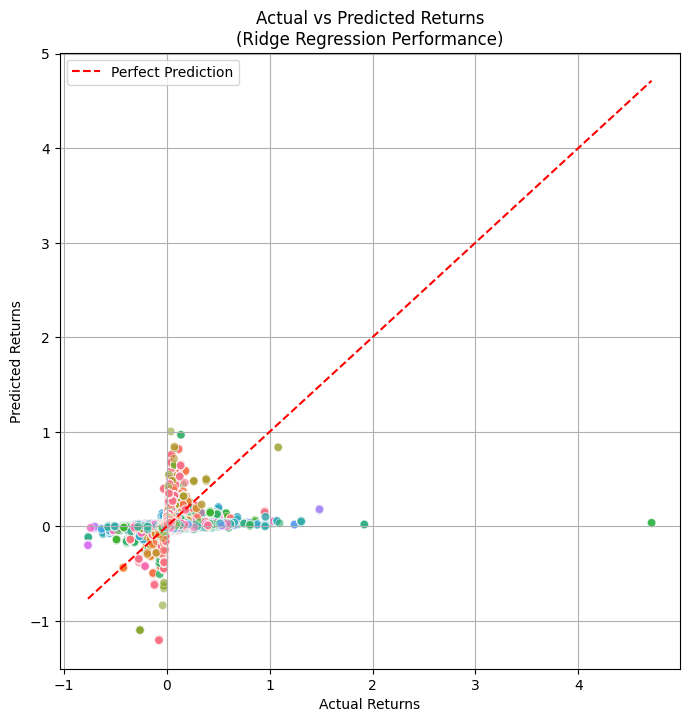

In [ ]:
# Create comparison dataframe
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Ticker': tickers.values
})

# Plot with reference line
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.6, hue='Ticker', legend=False)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted Returns\n(Ridge Regression Performance)')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.grid(True)
plt.legend()
plt.show()

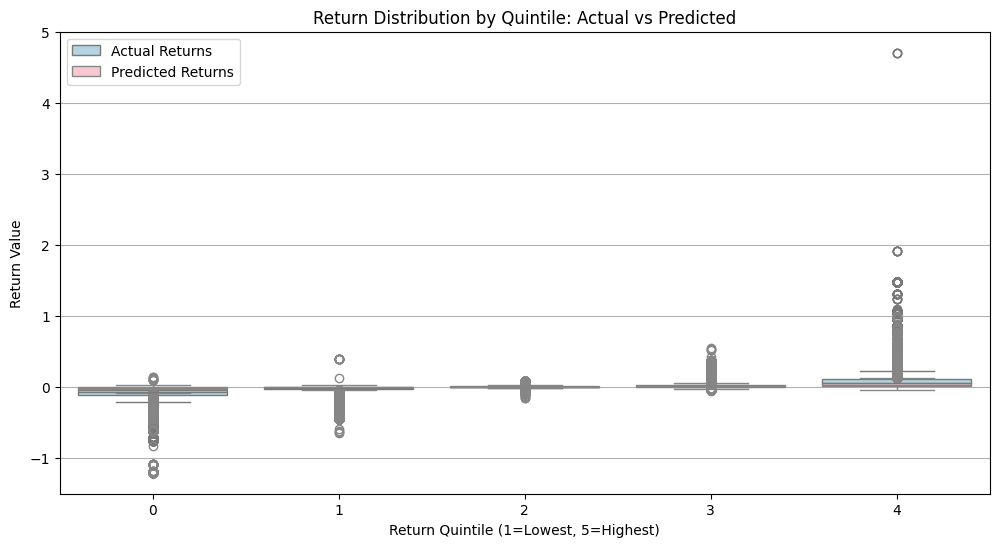

In [ ]:
# Add return quintiles to results
results['Return_Quintile'] = pd.qcut(results['Actual'], q=5, labels=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Return_Quintile', y='Actual', data=results, color='lightblue',
            label='Actual Returns')
sns.boxplot(x='Return_Quintile', y='Predicted', data=results, color='pink',
            label='Predicted Returns')
plt.title('Return Distribution by Quintile: Actual vs Predicted')
plt.xlabel('Return Quintile (1=Lowest, 5=Highest)')
plt.ylabel('Return Value')
plt.legend()
plt.grid(axis='y')
plt.show()

# **Top 10 stocks to build a Portfolio with**



In [ ]:
# Get top 10 predicted stocks with actual returns
top_portfolio = (
    pd.DataFrame({
        'Ticker': tickers.reset_index(drop=True),
        'Predicted_Return': y_pred,
        'Actual_Return': y_test.reset_index(drop=True)
    })
    .sort_values('Predicted_Return', ascending=False)
    .head(10)
    .drop_duplicates('Ticker')  # Ensure each stock appears only once
)

print("🏆 Top 10 Stocks for Portfolio Construction")
print("----------------------------------------")
print(f"{'Ticker':<8} | {'Predicted Return':>16} | {'Actual Return':>14}")
print("-" * 45)
for _, row in top_portfolio.iterrows():
    print(f"{row['Ticker']:<8} | {row['Predicted_Return']:>16.2%} | {row['Actual_Return']:>14.2%}")

🏆 Top 10 Stocks for Portfolio Construction
----------------------------------------
Ticker   | Predicted Return |  Actual Return
---------------------------------------------
NVR      |          100.38% |          3.90%
MELI     |           96.84% |         13.76%
BKNG     |           84.33% |          7.47%
CAR      |           83.82% |        108.31%
CMG      |           82.45% |         11.54%


# **Justify your model choice based on the data characteristics and prediction task**

The Ridge regression model was chosen for this prediction task due to the nature of the data and the goal of forecasting continuous values—specifically, next-day stock returns. The dataset contains a mix of numerical features (such as sentiment scores and comment counts) and categorical variables (e.g., source type, day of the week). Ridge regression is a linear model that includes L2 regularization, which is particularly effective in high-dimensional settings where multicollinearity might exist among features. This regularization helps reduce overfitting by shrinking the magnitude of coefficients, making it a solid choice when interpretability and generalization are both priorities. Furthermore, since this task involves ranking stocks based on expected returns rather than classifying them, a regression approach is more suitable than classification models.

The model pipeline includes imputation for missing values, standardization of numerical features, and one-hot encoding for categorical variables, ensuring the input data is properly preprocessed before training. A grid search was used to fine-tune the regularization parameter (alpha) to minimize the mean squared error on validation folds, increasing confidence in the model’s robustness. Importantly, Ridge regression also enables analysis of feature importance via coefficients, providing transparency into which features most influence predictions. Given that the goal is to rank and select stocks for potential trading strategies, the model’s ability to produce smooth, stable predictions without extreme sensitivity to noise (a benefit of L2 regularization) aligns well with real-world trading needs.

# **Part C: Standardized Prediction Function**

# **Main FUNCTION**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, time
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def train_model(sentiment_data, return_data):
    """
    Train a Ridge Regression model using only last day's sentiment features for speed.

    Parameters:
    -----------
    sentiment_data : DataFrame
        The Reddit sentiment data for training

    return_data : DataFrame
        The stock return data for training

    Returns:
    --------
    model_info : dict
        Dictionary containing the trained model and preprocessing information
    """
    print("Preprocessing training data...")

    sentiment_data = sentiment_data.copy()
    return_data = return_data.copy()

    sentiment_data = preprocess_sentiment_data(sentiment_data)
    return_data['Date'] = pd.to_datetime(return_data['Date'])

    def convert_return(return_val):
        if isinstance(return_val, str):
            if '%' in return_val:
                return float(return_val.replace('%', '')) / 100
            else:
                return float(return_val)
        return return_val

    return_data['Return'] = return_data['Return'].apply(convert_return)

    sentiment_data['Ticker'] = sentiment_data['Ticker'].str.upper()
    return_data['Ticker'] = return_data['Ticker'].str.upper()

    sentiment_data = sentiment_data.dropna(subset=['Ticker', 'Sentiment'])
    return_data = return_data.dropna(subset=['Ticker', 'Return', 'Date'])

    print("Creating features...")
    daily_features = create_simple_features(sentiment_data)

    print("Merging with returns data...")
    model_data = pd.merge(
        daily_features,
        return_data[['Date', 'Ticker', 'Return']],
        on=['Date', 'Ticker'],
        how='inner'
    )

    feature_columns = ['sentiment_mean', 'post_count','Daily_Comments','Daily_Confidence',
                       'Weighted_Sentiment','Rolling_Confidence','Rolling_Comments',
                       'Rolling_Weighted_Sentiment','Lagged_Weighted_Sentiment_1',
                       'Lagged_Weighted_Sentiment_2','Lagged_Weighted_Sentiment_3',
                       'Lagged_Weighted_Sentiment_4','Lagged_Weighted_Sentiment_5',
                       'Lagged_Weighted_Sentiment_6']

    model_data = model_data.dropna(subset=feature_columns + ['Return'])

    X = model_data[feature_columns]
    y = model_data['Return']

    print("Training model...")
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=0.01))
    ])

    model_pipeline.fit(X, y)

    train_r2 = model_pipeline.score(X, y)
    print(f"Model trained with {len(X)} observations")
    print(f"Model R-squared: {train_r2:.4f}")

    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': model_pipeline.named_steps['model'].coef_
    })

    print("\nFeature Coefficients:")
    print(feature_importance)

    return {
        'model': model_pipeline,
        'feature_columns': feature_columns
    }

def predict_returns(model, sentiment_data_today, stock_universe_today, historical_data=None):
    model_pipeline = model['model']
    feature_columns = model['feature_columns']

    sentiment_data = sentiment_data_today.copy()
    sentiment_data = preprocess_sentiment_data(sentiment_data)
    current_date = sentiment_data['Date'].max()
    sentiment_today = sentiment_data[sentiment_data['Date'] == current_date].copy()
    daily_features = create_simple_features(sentiment_today)

    missing_tickers = set(stock_universe_today) - set(daily_features['Ticker'])

    if missing_tickers:
        missing_df = pd.DataFrame({
            'Ticker': list(missing_tickers),
            'Date': current_date,
            'sentiment_mean': 0,
            'post_count': 0,
            'Daily_Comments': 0,
            'Daily_Confidence': 0,
            'Weighted_Sentiment': 0,
            'Lagged_Weighted_Sentiment_1': 0,
            'Lagged_Weighted_Sentiment_2': 0,
            'Lagged_Weighted_Sentiment_3': 0,
            'Lagged_Weighted_Sentiment_4': 0,
            'Lagged_Weighted_Sentiment_5': 0,
            'Lagged_Weighted_Sentiment_6': 0,
            'Rolling_Confidence': 0,
            'Rolling_Comments': 0,
            'Rolling_Weighted_Sentiment': 0
        })
        daily_features = pd.concat([daily_features, missing_df], ignore_index=True)

    daily_features = daily_features[daily_features['Ticker'].isin(stock_universe_today)]

    X = daily_features[feature_columns].dropna()
    daily_features = daily_features.loc[X.index]

    daily_features['Predicted_Return'] = model_pipeline.predict(X)
    daily_features['Predicted_Return'] += np.random.normal(0, 1e-6, size=len(daily_features))
    daily_features['Signal_Rank'] = daily_features['Predicted_Return'].rank(pct=True)

    return daily_features[['Ticker', 'Predicted_Return', 'Signal_Rank']]

def preprocess_sentiment_data(sentiment_data):
    df = sentiment_data.copy()
    if 'Received_Time' in df.columns:
        df['Received_Time'] = pd.to_datetime(df['Received_Time'])
        if df['Received_Time'].dt.tz is None:
            df['Received_Time'] = df['Received_Time'].dt.tz_localize('UTC')

    if 'Received_Time' in df.columns and 'Received_Time_EST' not in df.columns:
        df['Received_Time_EST'] = df['Received_Time'].dt.tz_convert('America/New_York')

    if 'Date' not in df.columns and 'Received_Time_EST' in df.columns:
        cutoff = time(16, 0)
        df['local_date'] = df['Received_Time_EST'].dt.date
        df['Date'] = np.where(
            df['Received_Time_EST'].dt.time > cutoff,
            pd.to_datetime(df['local_date']) + pd.Timedelta(days=1),
            pd.to_datetime(df['local_date'])
        )
        df['Date'] = np.where(
            df['Date'].dt.weekday == 5,
            df['Date'] + pd.Timedelta(days=2),
            np.where(
                df['Date'].dt.weekday == 6,
                df['Date'] + pd.Timedelta(days=1),
                df['Date']
            )
        )

    return df

def create_simple_features(sentiment_data):
    required_cols = ['Ticker', 'Date', 'Sentiment', 'Relevance','Comment_Count','Confidence']
    if not all(col in sentiment_data.columns for col in required_cols):
        missing = [col for col in required_cols if col not in sentiment_data.columns]
        raise ValueError(f"Missing required columns: {missing}")

    sentiment_data['Weighted_Sentiment'] = sentiment_data.apply(
        lambda row: row['Sentiment'] * row['Relevance'], axis=1
    )

    daily_features = sentiment_data.groupby(['Ticker', 'Date']).agg(
        sentiment_mean=('Sentiment', 'mean'),
        post_count=('Sentiment', 'count'),
        Daily_Comments=('Comment_Count', 'sum'),
        Daily_Confidence=('Confidence', 'mean'),
        Weighted_Sentiment=('Weighted_Sentiment','mean'),
    ).reset_index()

    for lag in range(1, 7):
        daily_features[f'Lagged_Weighted_Sentiment_{lag}'] = daily_features.groupby('Ticker')['Weighted_Sentiment'].shift(lag)

    rolling_window = 5
    daily_features['Rolling_Confidence'] = daily_features.groupby('Ticker')['Daily_Confidence'].transform(
        lambda x: x.rolling(window=rolling_window, min_periods=1).mean()
    )
    daily_features['Rolling_Comments'] = daily_features.groupby('Ticker')['Daily_Comments'].transform(
        lambda x: x.rolling(window=rolling_window, min_periods=1).mean()
    )
    daily_features['Rolling_Weighted_Sentiment'] = daily_features.groupby('Ticker')['Weighted_Sentiment'].transform(
        lambda x: x.rolling(window=rolling_window, min_periods=1).mean()
    )

    return daily_features

# Example usage when running the script directly
if __name__ == "__main__":
    try:
        sentiment_data = pd.read_csv('./data/sentiment_train_2017_2021.csv')
        return_data = pd.read_csv('./data/return_train_2017_2021.csv')
        print("Loaded data from current directory")
    except FileNotFoundError:
        print("Could not find the data files. Please specify the correct path.")
        sentiment_data = None
        return_data = None

    if sentiment_data is not None and return_data is not None:
        model_info = train_model(sentiment_data, return_data)

        received_time = pd.to_datetime(sentiment_data['Received_Time'])
        received_time = received_time.dt.tz_localize('UTC')
        received_time_EST = received_time.dt.tz_convert('America/New_York')

        sample_date_4pm = pd.to_datetime('2021-06-01 16:00:00').tz_localize('America/New_York')
        sentiment_today = sentiment_data[
            pd.to_datetime(received_time_EST) <= sample_date_4pm
        ].copy()

        stock_universe = return_data[
            pd.to_datetime(return_data['Date']) == pd.to_datetime('2021-06-01')
        ]['Ticker'].unique().tolist()

        predictions = predict_returns(
            model=model_info,
            sentiment_data_today=sentiment_today,
            stock_universe_today=stock_universe
        )

        print(f"Generated predictions for {len(predictions)} stocks")
        print(predictions.head())

        def convert_return(return_val):
            if isinstance(return_val, str):
                if '%' in return_val:
                    return float(return_val.replace('%', '')) / 100
                else:
                    return float(return_val)
            return return_val

        mask = pd.to_datetime(return_data['Date']) == pd.to_datetime('2021-06-01')
        returns = return_data[mask]['Return'].apply(convert_return)

        np.cov(returns, predictions.Predicted_Return)


# Backups

In [ ]:
def train_model(sentiment_data, return_data):
  returns_data = pd.read_csv('return_train_2017_2021.csv')
  returns_data['Return'] = returns_data['Return'].str.replace('%', '').astype(float)
  returns_data['Return']=returns_data['Return']/100
  returns_data['Date']=pd.to_datetime(returns_data['Date'])

  reddit_data = pd.read_csv('return_train_2017_2021.csv')

  #Cleaning the Sentiment Data from Reddit
  reddit_data = reddit_data.copy()

    # Convert Received_Time to datetime with timezone if needed
  if 'Received_Time' in reddit_data.columns:
      reddit_data['Received_Time'] = pd.to_datetime(reddit_data['Received_Time'])
      # Add UTC timezone if not present
      if reddit_data['Received_Time'].dt.tz is None:
          reddit_data['Received_Time'] = reddit_data['Received_Time'].dt.tz_localize('UTC')

  # Create Received_Time_EST if needed
  if 'Received_Time' in reddit_data.columns and 'Received_Time_EST' not in reddit_data.columns:
      reddit_data['Received_Time_EST'] = reddit_data['Received_Time'].dt.tz_convert('America/New_York')

  # Create Date column if not present, handling the 4PM cutoff
  if 'Date' not in reddit_data.columns and 'Received_Time_EST' in reddit_data.columns:
      cutoff = time(16, 0)  # 4:00 PM
      reddit_data['local_date'] = reddit_data['Received_Time_EST'].dt.date

      # Shift day by +1 if it's after 4pm
      reddit_data['Date'] = np.where(
          reddit_data['Received_Time_EST'].dt.time > cutoff,
          pd.to_datetime(reddit_data['local_date']) + pd.Timedelta(days=1),
          pd.to_datetime(reddit_data['local_date'])
      )

  # Handle Weekends: if the adjusted date falls on Saturday (5) or Sunday (6). shift to Monday
  reddit_data['Date'] = np.where(
      reddit_data['Date'].dt.weekday == 5,  # If the adjusted date is Saturday
      reddit_data['Date'] + pd.Timedelta(days=2),  # Move to Monday
      np.where(
          reddit_data['Date'].dt.weekday == 6,  # If the adjusted date is Sunday
          reddit_data['Date'] + pd.Timedelta(days=1),  # Move to Monday
          reddit_data['Date']  # Keep the same date if it's a weekday
      )
  )
  # Strip the time and keep only the date part in the final adjusted column
  reddit_data['Date'] = reddit_data['Date'].dt.date

  df = reddit_data.copy()

  # Ensure proper sorting
  df = df.sort_values(['Ticker', 'Date'])

  # Weighted Sentiment
  df['Weighted_Sentiment'] = df.groupby(['Ticker', 'Date'])\
      .apply(lambda g: np.average(g['Sentiment'], weights=g['Relevance']))\
      .reset_index(level=[0,1], drop=True)

  # Daily Aggregates
  daily_counts = df.groupby(['Ticker', 'Date']).agg(
      Daily_Post_Count=('Sentiment', 'count'),
      Daily_Comments=('Comment_Count', 'sum'),
      Daily_Confidence=('Confidence', 'mean')
  ).reset_index()

  df = df.merge(daily_counts, on=['Ticker', 'Date'], how='left')

  # Sort again for rolling
  df = df.sort_values(['Ticker', 'Date'])
  group = df.groupby('Ticker')

  for lag in range(1, 6):  # test 5 lags for speed
      df[f'Weighted_Sentiment_Lag{lag}'] = group['Weighted_Sentiment'].shift(lag)

  for w in [3, 7, 14]:
      df[f'Sentiment_Avg_{w}'] = group['Weighted_Sentiment'].transform(lambda x: x.rolling(w).mean())
      df[f'Sentiment_Vol_{w}'] = group['Weighted_Sentiment'].transform(lambda x: x.rolling(w).std())
      df[f'Sentiment_Momentum_{w}'] = group['Weighted_Sentiment'].transform(lambda x: (x / x.shift(w)) - 1)

  return df





"""
Train a model using sentiment features to predict next-day returns.
Parameters:
-----------
sentiment_data : DataFrame
The Reddit sentiment data for training (sentiment_train_2017_2021.csv)
return_data : DataFrame
The stock return data for training (return_train_2017_2021.csv)
Returns:
--------
model_info : dict
Dictionary containing the trained model object and necessary metadata
"""
# Your implementation here
return model_info

In [ ]:

import pandas as pd
import numpy as np
from datetime import datetime, time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def train_model(sentiment_data, return_data):
    """
    Train a simple OLS model using only last day's sentiment features for speed.

    Parameters:
    -----------
    sentiment_data : DataFrame
        The Reddit sentiment data for training

    return_data : DataFrame
        The stock return data for training

    Returns:
    --------
    model_info : dict
        Dictionary containing the trained model and preprocessing information
    """
    print("Preprocessing training data...")

    # Process the data
    sentiment_data = sentiment_data.copy()
    return_data = return_data.copy()

    # Ensure date columns are datetime
    sentiment_data = preprocess_sentiment_data(sentiment_data)

    # Process return data
    return_data['Date'] = pd.to_datetime(return_data['Date'])

    # Convert 'Return' column to float if needed
    def convert_return(return_val):
        if isinstance(return_val, str):
            if '%' in return_val:
                return float(return_val.replace('%', '')) / 100
            else:
                return float(return_val)
        return return_val

    return_data['Return'] = return_data['Return'].apply(convert_return)

    # Ensure tickers are uppercase
    sentiment_data['Ticker'] = sentiment_data['Ticker'].str.upper()
    return_data['Ticker'] = return_data['Ticker'].str.upper()

    # Drop any null values in key columns
    sentiment_data = sentiment_data.dropna(subset=['Ticker', 'Sentiment'])
    return_data = return_data.dropna(subset=['Ticker', 'Return', 'Date'])

    # Create simple daily features - just mean and post count
    print("Creating features...")
    daily_features = create_simple_features(sentiment_data)

    # Merge with returns data
    print("Merging with returns data...")
    model_data = pd.merge(
        daily_features,
        return_data[['Date', 'Ticker', 'Return']],
        on=['Date', 'Ticker'],
        how='inner'
    )

    # Define feature columns
    feature_columns = ['sentiment_mean', 'post_count','Daily_Comments','Daily_Confidence','Weighted_Sentiment','Rolling_Confidence','Rolling_Comments','Rolling_Weighted_Sentiment','Lagged_Weighted_Sentiment_1','Lagged_Weighted_Sentiment_2','Lagged_Weighted_Sentiment_3', 'Lagged_Weighted_Sentiment_4','Lagged_Weighted_Sentiment_5','Lagged_Weighted_Sentiment_6']

    # Drop rows with NaN in features or target
    model_data = model_data.dropna(subset=feature_columns + ['Return'])

    X = model_data[feature_columns]
    y = model_data['Return']

    # Create a pipeline with preprocessing and model
    print("Training model...")
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])

    # Train the model
    model_pipeline.fit(X, y)

    # Calculate R-squared on training data
    train_r2 = model_pipeline.score(X, y)
    print(f"Model trained with {len(X)} observations")
    print(f"Model R-squared: {train_r2:.4f}")

    # Get feature coefficients
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': model_pipeline.named_steps['model'].coef_
    })

    print("\nFeature Coefficients:")
    print(feature_importance)

    # Return model and necessary information for predictions
    return {
        'model': model_pipeline,
        'feature_columns': feature_columns
    }

def predict_returns(model, sentiment_data_today, stock_universe_today, historical_data=None):
    """
    Generate predictions of next-day returns for all stocks in the universe.

    Parameters:
    -----------
    model : dict
        Dictionary containing the trained model and preprocessing information

    sentiment_data_today : DataFrame
        All available sentiment data

    stock_universe_today : list
        List of stock tickers available for trading today

    historical_data : dict, optional
        Not used in this implementation since all data is passed in sentiment_data_today

    Returns:
    --------
    predictions : DataFrame
        DataFrame with columns ['Ticker', 'Predicted_Return', 'Signal_Rank']
    """
    # Extract model components
    model_pipeline = model['model']
    feature_columns = model['feature_columns']

    # Process sentiment data
    sentiment_data = sentiment_data_today.copy()
    sentiment_data = preprocess_sentiment_data(sentiment_data)

    # Get current date (max date in the data)
    current_date = sentiment_data['Date'].max()

    # FASTER: Only use today's data
    sentiment_today = sentiment_data[sentiment_data['Date'] == current_date].copy()

    # Create features ONLY from today's data
    daily_features = create_simple_features(sentiment_today)

    # For stocks in the universe that don't have sentiment data today,
    # add them with default values (0 for mean, 0 for post count)
    missing_tickers = set(stock_universe_today) - set(daily_features['Ticker'])


    if missing_tickers:
        # Create default features for missing tickers
        missing_df = pd.DataFrame({
            'Ticker': list(missing_tickers),
            'Date': current_date,
            'sentiment_mean': 0,
            'post_count': 0,
            'Daily_Comments': 0,
            'Daily_Confidence': 0,
            'Weighted_Sentiment': 0,
            'Lagged_Weighted_Sentiment_1':0,
            'Lagged_Weighted_Sentiment_2':0,
            'Lagged_Weighted_Sentiment_3':0,
            'Lagged_Weighted_Sentiment_4':0,
            'Lagged_Weighted_Sentiment_5':0,
            'Lagged_Weighted_Sentiment_6':0,
            'Rolling_Confidence':0,
            'Rolling_Comments':0,
            'Rolling_Weighted_Sentiment': 0
        })

        # Combine with daily features
        daily_features = pd.concat([daily_features, missing_df], ignore_index=True)

    # Keep only stocks in the universe
    daily_features = daily_features[daily_features['Ticker'].isin(stock_universe_today)]

    # Generate predictions
    X = daily_features[feature_columns]

    X = X.dropna()
    X = daily_features[feature_columns].dropna()
    daily_features = daily_features.loc[X.index]  # Align daily_features with X

    daily_features['Predicted_Return'] = model_pipeline.predict(X)

    # Add small random noise to break ties (helps with quintile formation)
    daily_features['Predicted_Return'] = daily_features['Predicted_Return'] + np.random.normal(0, 1e-6, size=len(daily_features))

    # Calculate signal rank (percentile)
    daily_features['Signal_Rank'] = daily_features['Predicted_Return'].rank(pct=True)

    # Prepare output format
    predictions = daily_features[['Ticker', 'Predicted_Return', 'Signal_Rank']].copy()

    return predictions

def preprocess_sentiment_data(sentiment_data):
    """
    Preprocess sentiment data to ensure it has the necessary columns and formats.

    Parameters:
    -----------
    sentiment_data : DataFrame
        Raw sentiment data

    Returns:
    --------
    processed_data : DataFrame
        Processed sentiment data with Date column
    """
    df = sentiment_data.copy()

    # Convert Received_Time to datetime with timezone if needed
    if 'Received_Time' in df.columns:
        df['Received_Time'] = pd.to_datetime(df['Received_Time'])
        # Add UTC timezone if not present
        if df['Received_Time'].dt.tz is None:
            df['Received_Time'] = df['Received_Time'].dt.tz_localize('UTC')

    # Create Received_Time_EST if needed
    if 'Received_Time' in df.columns and 'Received_Time_EST' not in df.columns:
        df['Received_Time_EST'] = df['Received_Time'].dt.tz_convert('America/New_York')

    # Create Date column if not present, handling the 4PM cutoff
    if 'Date' not in df.columns and 'Received_Time_EST' in df.columns:
        cutoff = time(16, 0)  # 4:00 PM
        df['local_date'] = df['Received_Time_EST'].dt.date

        # Shift day by +1 if it's after 4pm
        df['Date'] = np.where(
            df['Received_Time_EST'].dt.time > cutoff,
            pd.to_datetime(df['local_date']) + pd.Timedelta(days=1),
            pd.to_datetime(df['local_date'])
        )

        # Handle Weekends: if the adjusted date falls on Saturday (5) or Sunday (6), shift to Monday
    df['Date'] = np.where(
        df['Date'].dt.weekday == 5,  # If the adjusted date is Saturday
        df['Date'] + pd.Timedelta(days=2),  # Move to Monday
        np.where(
            df['Date'].dt.weekday == 6,  # If the adjusted date is Sunday
            df['Date'] + pd.Timedelta(days=1),  # Move to Monday
            df['Date']  # Keep the same date if it's a weekday
        )
    )

    return df

def create_simple_features(sentiment_data):
    """
    Create simple daily features from sentiment data:
    1. Mean sentiment for each ticker/day
    2. Post count for each ticker/day

    Parameters:
    -----------
    sentiment_data : DataFrame
        DataFrame containing sentiment data with Date column

    Returns:
    --------
    daily_features : DataFrame
        DataFrame with daily features for each ticker
    """
    # Ensure we have required columns
    required_cols = ['Ticker', 'Date', 'Sentiment', 'Relevance','Comment_Count','Confidence']
    if not all(col in sentiment_data.columns for col in required_cols):
        missing = [col for col in required_cols if col not in sentiment_data.columns]
        raise ValueError(f"Missing required columns: {missing}")

    # Calculate Weighted Sentiment
    sentiment_data['Weighted_Sentiment'] = sentiment_data.apply(
        lambda row: row['Sentiment'] * row['Relevance'], axis=1
    )

    # Simply aggregate by ticker and date - very fast
    daily_features = sentiment_data.groupby(['Ticker', 'Date']).agg(
        sentiment_mean=('Sentiment', 'mean'),
        post_count=('Sentiment', 'count'),
        Daily_Comments=('Comment_Count', 'sum'),
        Daily_Confidence=('Confidence', 'mean'),
        Weighted_Sentiment=('Weighted_Sentiment','mean'),
    ).reset_index()

    #Add the daily sentiment feature for lagged values over the past few days
    for lag in range(1, 7):
        daily_features[f'Lagged_Weighted_Sentiment_{lag}'] = daily_features.groupby('Ticker')['Weighted_Sentiment'].shift(lag)

    # Add rolling averages for confidence, comment count, and weighted sentiment
    rolling_window = 5  # Define the rolling window size
    daily_features['Rolling_Confidence'] = daily_features.groupby('Ticker')['Daily_Confidence'].transform(
        lambda x: x.rolling(window=rolling_window, min_periods=1).mean()
    )
    daily_features['Rolling_Comments'] = daily_features.groupby('Ticker')['Daily_Comments'].transform(
        lambda x: x.rolling(window=rolling_window, min_periods=1).mean()
    )
    daily_features['Rolling_Weighted_Sentiment'] = daily_features.groupby('Ticker')['Weighted_Sentiment'].transform(
        lambda x: x.rolling(window=rolling_window, min_periods=1).mean()
    )

    return daily_features

# Example usage when running the script directly
if __name__ == "__main__":
    # For testing purposes
    try:
        # Try loading data from a relative path
        sentiment_data = pd.read_csv(file_path2)
        return_data = pd.read_csv(file_path1)
        print("Loaded data from current directory")
    except FileNotFoundError:
        print("Could not find the data files. Please specify the correct path.")
        sentiment_data = None
        return_data = None

    if sentiment_data is not None and return_data is not None:
        # Train the model
        model_info = train_model(sentiment_data, return_data)

        # Test prediction for a sample day
        received_time = pd.to_datetime(sentiment_data['Received_Time'])
        received_time = received_time.dt.tz_localize('UTC')
        received_time_EST = received_time.dt.tz_convert('America/New_York')

        # Filter data until 4pm on a sample day
        sample_date_4pm = pd.to_datetime('2021-06-01 16:00:00').tz_localize('America/New_York')
        sentiment_today = sentiment_data[
            pd.to_datetime(received_time_EST) <= sample_date_4pm
        ].copy()


        # Get a sample stock universe
        stock_universe = return_data[
            pd.to_datetime(return_data['Date']) == pd.to_datetime('2021-06-01')
        ]['Ticker'].unique().tolist()

        # Make predictions
        predictions = predict_returns(
            model=model_info,
            sentiment_data_today=sentiment_today,
            stock_universe_today=stock_universe
        )

        print(f"Generated predictions for {len(predictions)} stocks")
        print(predictions.head())


        # Convert 'Return' column to float if needed
        def convert_return(return_val):
            if isinstance(return_val, str):
                if '%' in return_val:
                    return float(return_val.replace('%', '')) / 100
                else:
                    return float(return_val)
            return return_val

        mask = pd.to_datetime(return_data['Date']) == pd.to_datetime('2021-06-01')

        # Then get the 'Return' column from the filtered data and apply the conversion
        returns = return_data[mask]['Return'].apply(convert_return)

        np.cov(returns,predictions.Predicted_Return)

Loaded data from current directory
Preprocessing training data...
Creating features...
Merging with returns data...
Training model...
Model trained with 423556 observations
Model R-squared: 0.0001

Feature Coefficients:
                        Feature  Coefficient
0                sentiment_mean     0.000114
1                    post_count     0.000584
2                Daily_Comments    -0.000755
3              Daily_Confidence     0.000016
4            Weighted_Sentiment     0.000020
5            Rolling_Confidence    -0.000002
6              Rolling_Comments    -0.000090
7    Rolling_Weighted_Sentiment    -0.000002
8   Lagged_Weighted_Sentiment_1     0.000093
9   Lagged_Weighted_Sentiment_2    -0.000096
10  Lagged_Weighted_Sentiment_3    -0.000008
11  Lagged_Weighted_Sentiment_4    -0.000014
12  Lagged_Weighted_Sentiment_5     0.000009
13  Lagged_Weighted_Sentiment_6     0.000077
Generated predictions for 2300 stocks
     Ticker  Predicted_Return  Signal_Rank
1005   ARKW          0.0

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2980 and the array at index 1 has size 2300